# Harmonic-percussive-residual source separation



In [1]:
from __future__ import print_function

In [2]:
import librosa
import IPython.display
import numpy as np

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
# Load the example track
#y, sr = librosa.load('audio/Kevin_MacLeod_-_Camille_Saint-Sans_Danse_Macabre_-_Sad_Part.mp3')
y, sr = librosa.load('audio/Karissa_Hobbs_-_09_-_Lets_Go_Fishin.mp3', offset=40, duration=10)

In [113]:
D = librosa.stft(y)

In [114]:
# Decompose D into harmonic and percussive components
D_harmonic, D_percussive = librosa.decompose.hpss(D)

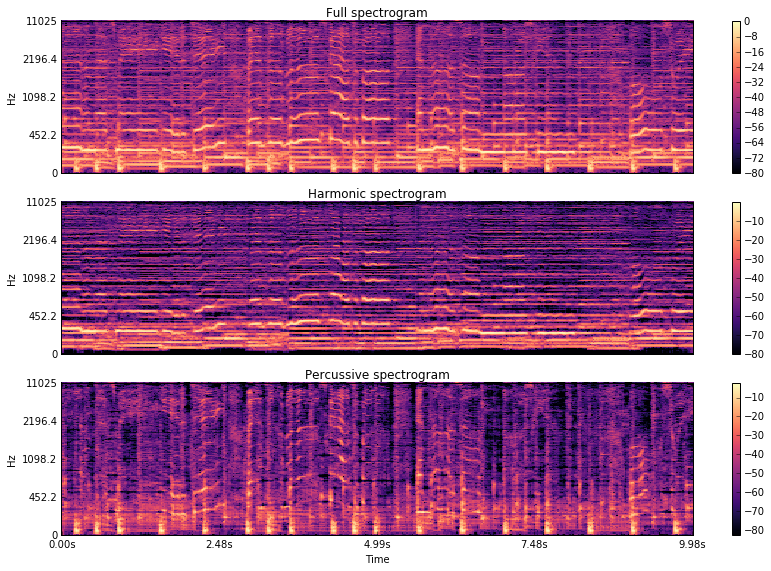

In [115]:
# Pre-compute a global reference power from the input spectrum
rp = np.max(np.abs(D))**2

plt.figure(figsize=(12, 8))
plt.subplot(3,1,1)
librosa.display.specshow(librosa.logamplitude(D**2, ref_power=rp), y_axis='log')
plt.colorbar()
plt.title('Full spectrogram')
plt.subplot(3,1,2)
librosa.display.specshow(librosa.logamplitude(D_harmonic**2, ref_power=rp), y_axis='log')
plt.colorbar()
plt.title('Harmonic spectrogram')
plt.subplot(3,1,3)
librosa.display.specshow(librosa.logamplitude(D_percussive**2, ref_power=rp), y_axis='log', x_axis='time')
plt.colorbar()
plt.title('Percussive spectrogram')
plt.tight_layout()

In [116]:
# We can make this stricter by using a larger margins.
# The default (above) corresponds to margin=1

D_harmonic2, D_percussive2 = librosa.decompose.hpss(D, margin=2)
D_harmonic4, D_percussive4 = librosa.decompose.hpss(D, margin=4)
D_harmonic8, D_percussive8 = librosa.decompose.hpss(D, margin=8)
D_harmonic16, D_percussive16 = librosa.decompose.hpss(D, margin=16)

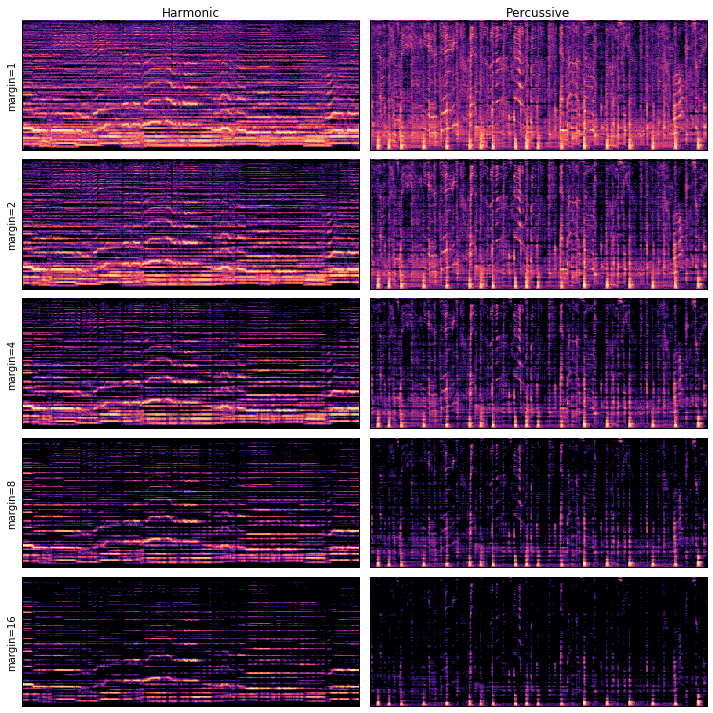

In [117]:
plt.figure(figsize=(10, 10))

plt.subplot(5,2,1)
librosa.display.specshow(librosa.logamplitude(D_harmonic**2, ref_power=rp), y_axis='log')
plt.title('Harmonic')
plt.yticks([])
plt.ylabel('margin=1')

plt.subplot(5,2,2)
librosa.display.specshow(librosa.logamplitude(D_percussive**2, ref_power=rp), y_axis='log')
plt.title('Percussive')
plt.yticks([]) ,plt.ylabel('')

plt.subplot(5,2,3)
librosa.display.specshow(librosa.logamplitude(D_harmonic2**2, ref_power=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=2')

plt.subplot(5,2,4)
librosa.display.specshow(librosa.logamplitude(D_percussive2**2, ref_power=rp), y_axis='log')
plt.yticks([]) ,plt.ylabel('')

plt.subplot(5,2,5)
librosa.display.specshow(librosa.logamplitude(D_harmonic4**2, ref_power=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=4')

plt.subplot(5,2,6)
librosa.display.specshow(librosa.logamplitude(D_percussive4**2, ref_power=rp), y_axis='log')
plt.yticks([]) ,plt.ylabel('')

plt.subplot(5,2,7)
librosa.display.specshow(librosa.logamplitude(D_harmonic8**2, ref_power=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=8')

plt.subplot(5,2,8)
librosa.display.specshow(librosa.logamplitude(D_percussive8**2, ref_power=rp), y_axis='log')
plt.yticks([]) ,plt.ylabel('')

plt.subplot(5,2,9)
librosa.display.specshow(librosa.logamplitude(D_harmonic16**2, ref_power=rp), y_axis='log')
plt.yticks([])
plt.ylabel('margin=16')

plt.subplot(5,2,10)
librosa.display.specshow(librosa.logamplitude(D_percussive16**2, ref_power=rp), y_axis='log')
plt.yticks([]) ,plt.ylabel('')

plt.tight_layout()